In [1]:
# this python script processes the twitter data from nltk 

In [2]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import string

In [3]:
from datetime import datetime
from datetime import timedelta

td = timedelta (days = 0, hours = 6 , minutes = 48)  # difference between laptop time and realtime
Anfang = datetime.now()
Start = Anfang + td

In [4]:
from tp_utils import *

In [5]:
import preprocessor as prp

def normalize_text(doc):
    tokens = []
    for sent in doc.sents:
        sent = str(sent)
        sent = sent.replace('\r', ' ').replace('\n', ' ')
        lower = sent.lower()
        nopunc = lower.translate(translator)
        words = nopunc.split()
        nostop = [w for w in words if w not in stoplist]
        no_numbers = [w if not w.isdigit() else '#' for w in nostop]
        stemmed = [stemmer.stem(w) for w in no_numbers]
        tokens += stemmed
    return tokens

In [6]:
from nltk.corpus import twitter_samples
fids = twitter_samples.fileids()
strs = twitter_samples.strings(fids[2])
#len(strs) # 20000

def clean_tweet(tweet):
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
    tweet = re.sub(r'['+string.punctuation+']+', '', tweet)
    return tweet

def clean_tweet2(tweet):
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r' #[\w]+ ', ' ', tweet)
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
#    tweet = re.sub(r'['+string.punctuation+']+', '', tweet)
    tweet = re.sub(r' ['+string.punctuation+']+ ', ' ', tweet)
    return tweet

In [7]:
import spacy
from spacy.lang.en import English
nlp = English()

nlp2 = spacy.load('en_core_web_sm')

dftw = pd.DataFrame(index = range(0,0), columns=['leng', 'nwords', 'ntoks', 'nverbs', 'npast', 'npresent', 'nfuture', 'nfpast', 'nfpresent', 'nffuture', 'tw'], dtype = int)

for col in ['leng', 'nwords', 'ntoks', 'nverbs', 'npast', 'npresent', 'nfuture', 'nfpast', 'nfpresent', 'nffuture']:
    dftw[col] = dftw[col].astype(int)

dftw['tw'] = dftw['tw'].astype(object)

twfids = twitter_samples.fileids()
strs = twitter_samples.strings(twfids[2])

In [8]:
for i in range(len(strs)):
    twc = prp.clean(strs[i])
    dftw.at[i, 'tw'] = twc

    dftw.at[i, 'leng'] = len(twc)

    doc = nlp2(twc)

    cltoks = normalize_text(doc)
    ntoks = [str(token).lower() for token in list(doc) if (not token.is_punct) & (not token.is_space) & (not token.is_stop) & (str(token) in cltoks)]
    dftw.at[i, 'ntoks'] = len(ntoks)

    sentences = [sent.string.strip() for sent in doc.sents]
    dftw.at[i, 'nsents'] =  len(sentences)
    dftw.at[i, 'nwords'] = len([token for token in doc if not token.is_punct])

    dftw.at[i, 'nverbs'] = len([w for w in list(doc) if w.tag_.startswith('V')])

    npast, npresent, nfuture, antpast, antpresent, antfuture = spacy_parse(doc)
#
    dftw.at[i, 'npast'] = npast
    dftw.at[i, 'npresent'] = npresent
    dftw.at[i, 'nfuture'] = nfuture

    dftw.at[i, 'antpast'] = antpast
    dftw.at[i, 'antpresent'] = antpresent
    dftw.at[i, 'antfuture'] = antfuture

    nfpast, nfpresent, nffuture, antfpast, antfpresent, antffuture = liwc_parse(twc)
#
    dftw.at[i, 'nfpast'] = nfpast
    dftw.at[i, 'nfpresent'] = nfpresent
    dftw.at[i, 'nffuture'] = nffuture
    dftw.at[i, 'antfpast'] = antfpast
    dftw.at[i, 'antfpresent'] = antfpresent
    dftw.at[i, 'antffuture'] = antffuture

    dftw.at[i, 'ldeont'] = deont_parse(twc)
    dftw.at[i, 'lmodal'] = modal_parse(twc)
#
    if (i %579 == 0):
        je = datetime.now() + td
        pkl_fname = 'pj_dftw_full.' + je.strftime('%Y%m%d_%H%M%S' + ".pkl")
        print ("jetzt:{0}  i:{1} ... interim checkpointing to {2}".format(je, i, pkl_fname))
        dftw.to_pickle(pkl_fname)

jetzt:2019-06-29 21:28:11.510813  i:0 ... interim checkpointing to pj_dftw_full.20190629_212811.pkl
jetzt:2019-06-29 21:28:59.560156  i:579 ... interim checkpointing to pj_dftw_full.20190629_212859.pkl
jetzt:2019-06-29 21:29:40.453085  i:1158 ... interim checkpointing to pj_dftw_full.20190629_212940.pkl
jetzt:2019-06-29 21:30:21.174419  i:1737 ... interim checkpointing to pj_dftw_full.20190629_213021.pkl
jetzt:2019-06-29 21:31:01.800197  i:2316 ... interim checkpointing to pj_dftw_full.20190629_213101.pkl
jetzt:2019-06-29 21:31:42.885154  i:2895 ... interim checkpointing to pj_dftw_full.20190629_213142.pkl
jetzt:2019-06-29 21:32:23.914505  i:3474 ... interim checkpointing to pj_dftw_full.20190629_213223.pkl
jetzt:2019-06-29 21:33:06.753227  i:4053 ... interim checkpointing to pj_dftw_full.20190629_213306.pkl
jetzt:2019-06-29 21:33:52.175291  i:4632 ... interim checkpointing to pj_dftw_full.20190629_213352.pkl
jetzt:2019-06-29 21:34:45.066815  i:5211 ... interim checkpointing to pj_dftw

In [9]:
je = datetime.now() + td
pkl_fname = 'pj_dftw_full.' + je.strftime('%Y%m%d_%H%M%S' + ".pkl")
print ("jetzt:{0}  i:{1} ... final checkpointing to {2}".format(je, i, pkl_fname))
dftw.to_pickle(pkl_fname)


jetzt:2019-06-30 00:56:52.633221  i:19999 ... final checkpointing to pj_dftw_full.20190630_005652.pkl


# make a plot

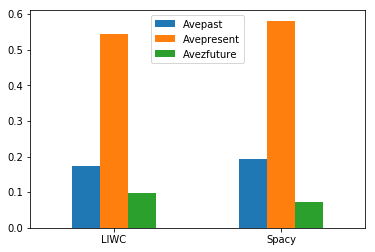

In [10]:
sAvepast = dftw["antpast"].mean()
sAvepresent = dftw["antpresent"].mean()
sAvezfuture = dftw["antfuture"].mean()

lAvepast = dftw["antfpast"].mean()
lAvepresent = dftw["antfpresent"].mean()
lAvezfuture = dftw["antffuture"].mean()

modfplot = pd.DataFrame({'Avepast' : [lAvepast, sAvepast], 'Avepresent': [lAvepresent, sAvepresent], 'Avezfuture': [lAvezfuture, sAvezfuture]}, index = ['LIWC', 'Spacy'] )
modfplot.plot.bar(rot=0)
plt.show()

In [12]:
dftw.head()

,leng,nwords,ntoks,nverbs,npast,npresent,nfuture,nfpast,nfpresent,nffuture,tw,nsents,antpast,antpresent,antfuture,antfpast,antfpresent,antffuture,ldeont,lmodal
0,99.0,20.0,3.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,: Indirect cost of the UK being in the EU is e...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VIDEO: Sturgeon on post-election deals,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,104.0,18.0,3.0,4.0,2.0,0.0,0.0,2.0,2.0,0.0,: The economy was growing times faster on the ...,1.0,1.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0
3,71.0,13.0,3.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,: the UKIP east lothian candidate looks about ...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,75.0,13.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,: UKIP's housing spokesman rakes in £800k in h...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
dftw["lmodal"].describe()
dftw["lmodal"].sum()

1672.0